In [1]:
%matplotlib widget

In [2]:
import xtrack as xt
import matplotlib.pyplot as plt

In [3]:
line = xt.Line.from_json('lattice/lep_sol.json')

Loading line from dict:   0%|          | 0/9667 [00:00<?, ?it/s]

Done loading line from dict.           


### Machine with solenoids off

In [4]:
line['on_solenoids'] = 0
line['on_spin_bumps'] = 0
line['on_coupling_corrections'] = 0

In [5]:
tw = line.twiss4d(spin=True, polarization=True)

In [6]:
print(f'Equilibrium polarization: {tw.spin_polarization_eq*100:.3f} %')

Equilibrium polarization: 92.376 %


(0.999, 1.001)

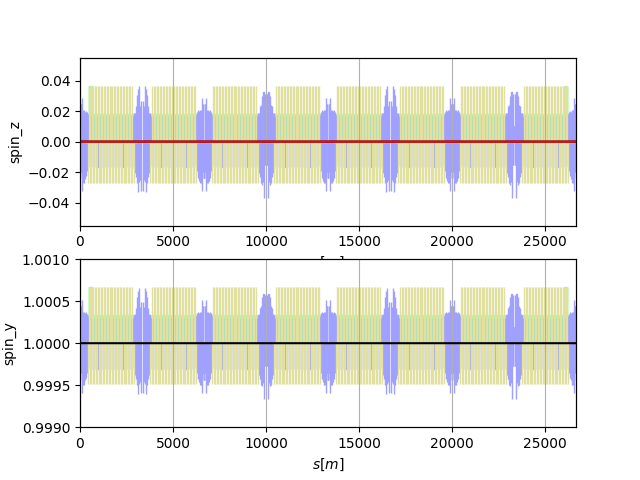

In [8]:
plt.figure()
ax1 = plt.subplot(2, 1, 1)
tw.plot('spin_x spin_z', ax=ax1)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
tw.plot('spin_y', ax=ax2)
plt.ylim(0.999, 1.001)

### Machine with solenoids on

In [9]:
line['on_solenoids'] = 1
line['on_spin_bumps'] = 0
line['on_coupling_corrections'] = 1

In [10]:
tw = line.twiss4d(spin=True, polarization=True)

In [11]:
print(f'Equilibrium polarization: {tw.spin_polarization_eq*100:.3f} %')

Equilibrium polarization: 1.860 %


(0.995, 1.0)

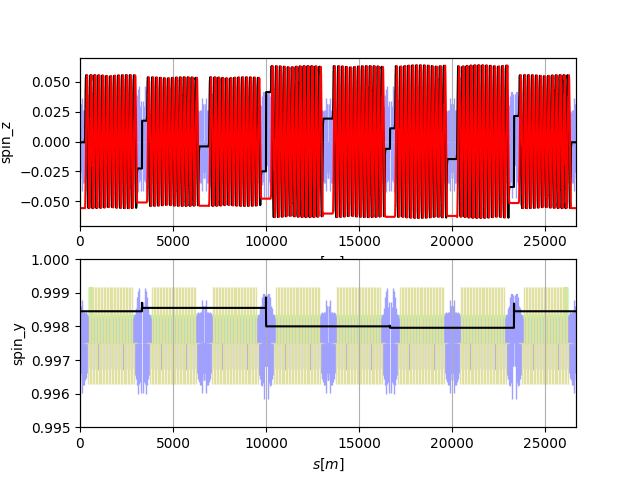

In [12]:
plt.figure()
ax1 = plt.subplot(2, 1, 1)
tw.plot('spin_x spin_z', ax=ax1)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
tw.plot('spin_y', ax=ax2)
plt.ylim(0.995, 1.0)

### Machine with solenoids and spin bumps

In [13]:
line['on_solenoids'] = 1
line['on_spin_bumps'] = 1
line['on_coupling_corrections'] = 1

In [14]:
tw = line.twiss4d(spin=True, polarization=True)

In [15]:
print(f'Equilibrium polarization: {tw.spin_polarization_eq*100:.3f} %')

Equilibrium polarization: 89.027 %


(0.998, 1.001)

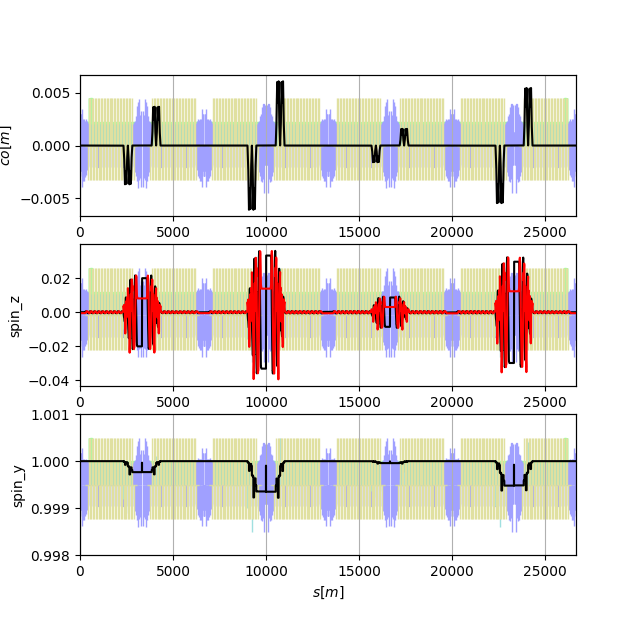

In [16]:
plt.figure(figsize=(6.4, 4.8*1.3))
ax1 = plt.subplot(3, 1, 1)
tw.plot('y', ax=ax1)
ax2 = plt.subplot(3, 1, 2)
tw.plot('spin_x spin_z', ax=ax2)
ax3 = plt.subplot(3, 1, 3, sharex=ax1)
tw.plot('spin_y', ax=ax3)
plt.ylim(0.998, 1.001)

Text(0, 0.5, 'spin_x')

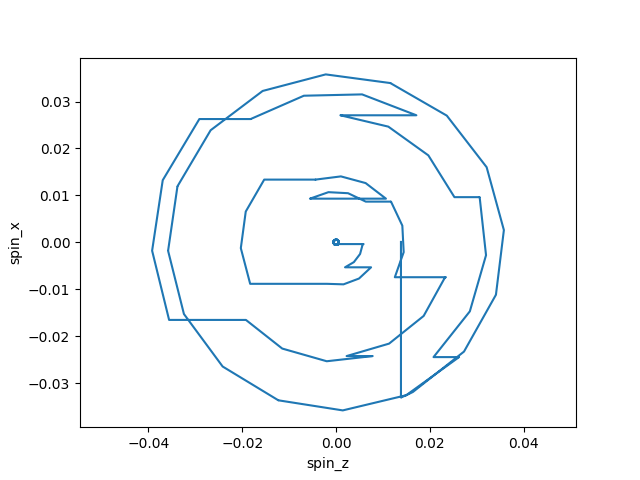

In [17]:
# Spin precession on one side of IP4
tw4 = tw.rows['ip3':'ip4']

plt.figure()
plt.axis('equal')
plt.plot(tw4.spin_z, tw4.spin_x)
plt.xlabel('spin_z')
plt.ylabel('spin_x')